# Happiness and Freedom of Movement

## An examination of how happiness correlates to personal and economic freedom.

##### Analysis derived from data using the most recent World Happiness Report and Human Freedom Index.



### Statements to consider

##### General

* Freedom is positively correlated with Happiness.

##### Personal freedom of movement with relation to geographic isolation

* People in land-locked countries are less happy than others considering all other factors.

##### Happiness with relation to religious and gender freedom (personal freedom of movement)

* People in countries with reduced religious freedom and women's moveement are less happy than others.


In [1]:
# imports

import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sqlalchemy as sa

# create sqlite database and path

from sqlalchemy import create_engine
engine = create_engine('sqlite:///Happiness_Freedom.db')

# set seaborn default theme

sns.set(color_codes=True)

# multiple outputs from single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [60]:
# create dataframe from csv

hfi_file = pd.read_csv("hfi_cc_2018.csv")
hfi = pd.DataFrame(hfi_file)

whr_file = pd.read_csv("whr_2017.csv")
whr = pd.DataFrame(whr_file)

# create database and tables from dataframe (database and table have been previously created using this code)

# hfi.to_sql("Human Freedom Index", con=engine)
# whr.to_sql("World Happiness Report", con=engine)

hfi.info()
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


  
  
  
### Happiness is directly correlated with freedom

In [73]:
# get overall freedom score by country from World Freedom Report

hf_score_by_country = hfi[["countries", "hf_score"]]

# get overall happiness score by country from Happiness Index

wh_score_by_country = whr[["Country", "Happiness.Score"]]

# set "Country" column to "countries" to merge on conat with freedom index

wh_score_by_country.columns = ["countries", "hp_score"]

# coombine the two dataframes

reports_combined = pd.concat([hf_score_by_country, wh_score_by_country], sort=True)
reports_grouped = reports_combined.groupby("countries")["hf_score", "hp_score"].mean()
hf_wh_scores = reports_grouped.dropna()

C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of Happiness and Freedom')

Text(0.5,0,'Happiness')

Text(0,0.5,'Freedom')

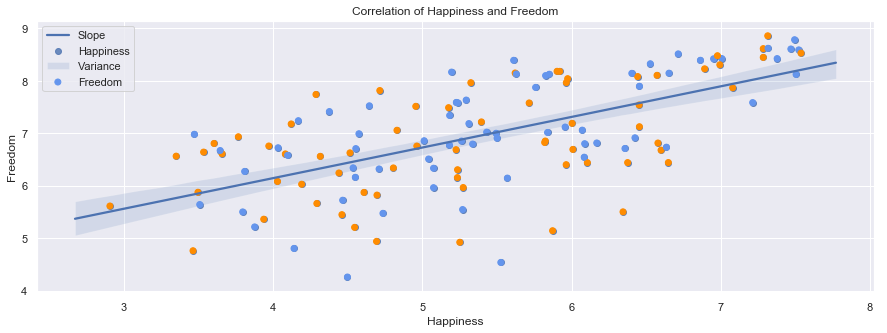

In [72]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hp_score", y="hf_score", data=hf_wh_scores)
points = plt.scatter(hf_wh_scores["hp_score"], hf_wh_scores["hf_score"], c=["cornflowerblue", "darkorange"])
ax.set_title("Correlation of Happiness and Freedom")
ax.set_xlabel("Happiness")
ax.set_ylabel("Freedom")
ax.legend(["Slope", "Happiness", "Variance", "Freedom"])

  
  
  
  
  
  
### General Freedom and Freedom of Movement

C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Movement Freedom')

Text(0.5,0,'Movement Freedom')

Text(0,0.5,'General Freedom')

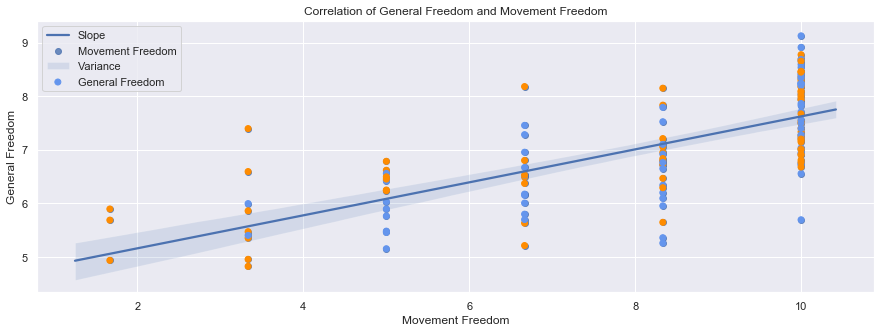

In [78]:
# retrieve movement and freedom data from Human Freedom Index grouped by country and ordered by freedom score

hfi_movement_and_freedom_data = "SELECT hf_score, pf_movement FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_movement_and_freedom_raw = pd.read_sql(hfi_movement_and_freedom_data, con=engine)
hfi_movement_and_freedom = hfi_movement_and_freedom_raw.dropna()

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="pf_movement", y="hf_score", data=hfi_movement_and_freedom)
points = plt.scatter(hfi_movement_and_freedom["pf_movement"], hfi_movement_and_freedom["hf_score"], c=["cornflowerblue", "darkorange"])
ax.set_title("Correlation of General Freedom and Movement Freedom")
ax.set_xlabel("Movement Freedom")
ax.set_ylabel("General Freedom")
ax.legend(["Slope", "Movement Freedom", "Variance", "General Freedom"])


## Happiness and Movement Freedom

C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Happiness and Movement Freedom')

Text(0.5,0,'Movement Freedom')

Text(0,0.5,'General Happiness')

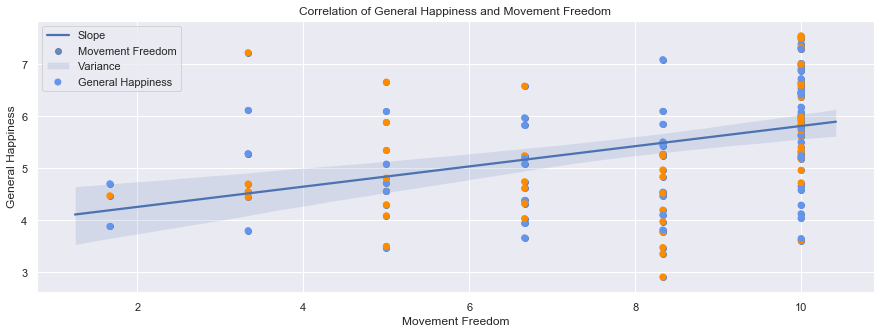

In [81]:
# Happiness and Movement Freedom

# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score

hfi_movement_by_country_data = "SELECT countries, pf_movement FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_movement_by_country_raw = pd.read_sql(hfi_movement_by_country_data, con=engine)
hfi_movement_by_country = hfi_movement_by_country_raw.dropna()

# retrieve happiness score data from World Happiness Report groupd by country and ordered by happiness score

whr_happiness_by_country_data = "SELECT Country as countries, `Happiness.Score` as hp_score FROM 'World Happiness Report' GROUP BY countries ORDER BY hp_score DESC"
whr_happiness_by_country_raw = pd.read_sql(whr_happiness_by_country_data, con=engine)
whr_happiness_by_country = whr_happiness_by_country_raw.dropna()

# coombine the two dataframes grouping by county and dropping null values

hfi_movement_whr_happiness_by_country_combined = pd.concat([hfi_movement_by_country, whr_happiness_by_country], sort=True)
hfi_movement_whr_happiness_by_country_grouped = hfi_movement_whr_happiness_by_country_combined.groupby("countries")["pf_movement", "hp_score"].mean()
hfi_movement_whr_happiness_by_country = hfi_movement_whr_happiness_by_country_grouped.dropna()

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="pf_movement", y="hp_score", data=hfi_movement_whr_happiness_by_country)
points = plt.scatter(hfi_movement_whr_happiness_by_country["pf_movement"], hfi_movement_whr_happiness_by_country["hp_score"], c=["cornflowerblue", "darkorange"])
ax.set_title("Correlation of General Happiness and Movement Freedom")
ax.set_xlabel("Movement Freedom")
ax.set_ylabel("General Happiness")
ax.legend(["Slope", "Movement Freedom", "Variance", "General Happiness"])


# Human Freedom and Economic Freedom

C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Economic Freedom')

Text(0.5,0,'General Freedom')

Text(0,0.5,'Economic Freedom')

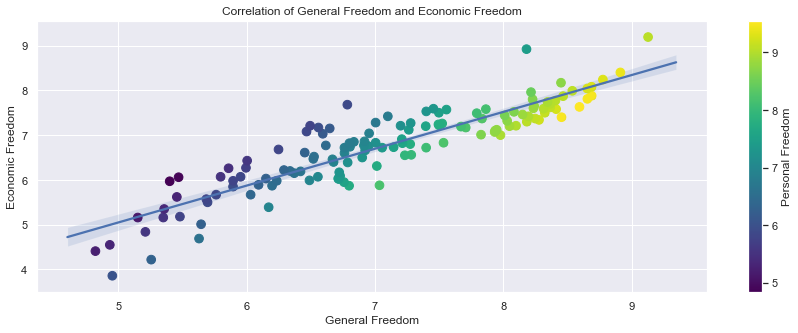

In [83]:
# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score

hfi_freedom_and_economy_data = "SELECT countries, hf_score, ef_score, pf_score, pf_movement_women FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_freedom_and_economy_raw = pd.read_sql(hfi_freedom_and_economy_data, con=engine)
hfi_freedom_and_economy = hfi_freedom_and_economy_raw.dropna()

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="ef_score", data=hfi_freedom_and_economy)
points = plt.scatter(hfi_freedom_and_economy["hf_score"], hfi_freedom_and_economy["ef_score"], c=hfi_freedom_and_economy["pf_score"], s=75, cmap="viridis")
cbar = plt.colorbar(points)
cbar.set_label("Personal Freedom")
ax.set_title("Correlation of General Freedom and Economic Freedom")
ax.set_xlabel("General Freedom")
ax.set_ylabel("Economic Freedom")


C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Correlation of General Freedom and Economic Freedom')

Text(0.5,0,'General Freedom')

Text(0,0.5,'Economic Freedom')

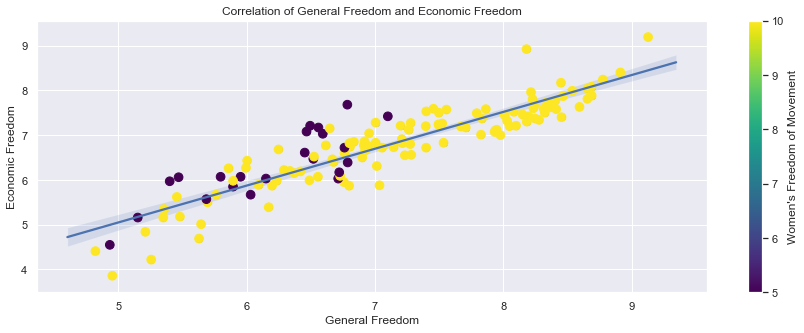

In [26]:
# examination as above but colored by women's personal freedome of movement (similar correlation)

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="ef_score", data=hfi_freedom_and_economy)
points = plt.scatter(hfi_freedom_and_economy["hf_score"], hfi_freedom_and_economy["ef_score"], c=hfi_freedom_and_economy["pf_movement_women"], s=75, cmap="viridis")
cbar = plt.colorbar(points)
cbar.set_label("Women's Freedom of Movement")
ax.set_title("Correlation of General Freedom and Economic Freedom")
ax.set_xlabel("General Freedom")
ax.set_ylabel("Economic Freedom")


C:\Users\jerem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Freedom/Happiness in Landlocked vs non-Landlocked countries')

Text(0.5,0,'Freedom')

Text(0,0.5,'Happiness')

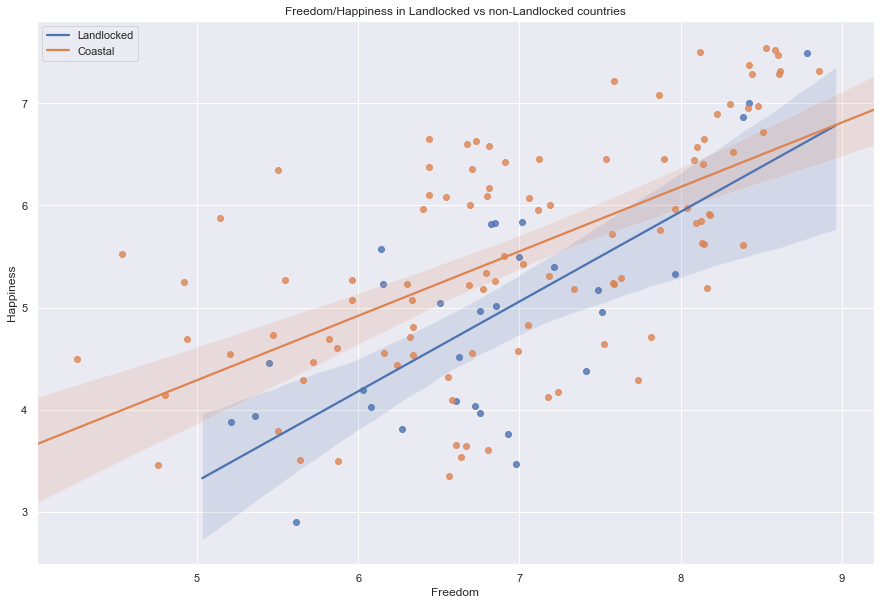

In [90]:
# get list of land locked countries

land_locked_countries = pd.Series(["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"])

# list non land locked countries

hf_wf_scores_ni = hf_wh_scores.reset_index()

llc_Freedom_happiness = hf_wf_scores_ni.loc[hf_wf_scores_ni["countries"].isin(land_locked_countries)]
nll_freedom = hf_wf_scores_ni.loc[~hf_wf_scores_ni["countries"].isin(land_locked_countries)]

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="hf_score", y="hp_score", data=llc_Freedom_happiness)
sns.regplot(x="hf_score", y="hp_score", data=nll_freedom)
ax.set_title("Freedom/Happiness in Landlocked vs non-Landlocked countries")
ax.set_xlabel("Freedom")
ax.set_ylabel("Happiness")
ax.legend(["Landlocked", "Coastal"])


The data seems to confirm that residents of land-locked countries are generally less happy and free than their coastal counterparts.